In [ ]:
# enable huge pages
# echo always >/sys/kernel/mm/transparent_hugepage/enabled

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(style='whitegrid')

In [8]:
def parse(filename):
    data = !cat {filename}
    ns, xs, ys = [], [], []
    for row in data[:-1]:
        n, x, y = row.split()
        ns.append(int(n))
        xs.append(float(x))
        ys.append(float(y))
    return ns, xs, ys

n, absl_x, absl_y = parse('absl.log')
_, set_x, set_y = parse('set.log')
_, btree_x, btree_y = parse('btree.log')

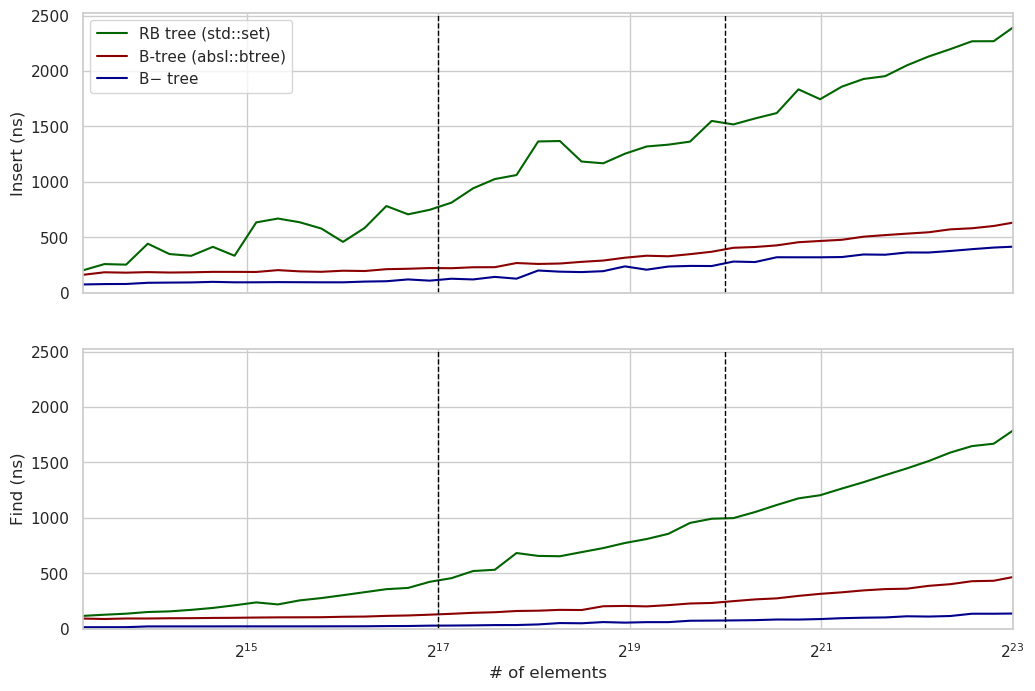

In [24]:
relative = False
filename = 'btree-absolute.svg'

fig, (top, bot) = plt.subplots(2, sharex=True, sharey=(relative is False))

top.label_outer()

#fig.suptitle(, y=0.95)

plt.xscale('log', basex=2)
plt.xlabel('# of elements')

if relative:
    top.set_ylabel('Insert (rel. to std::set)')
    bot.set_ylabel('Find (rel. to set::set)')
else:
    top.set_ylabel('Insert (ns)')
    bot.set_ylabel('Find (ns)')

absl_c = 'darkred'
absl_l = 'B-tree (absl::btree)'

btree_c = 'darkblue'
btree_l = 'B− tree'

if relative:
    def rel(a, b):
        return [y / x for x, y in zip(a, b)]

    top.plot(n, rel(absl_x, set_x), color=absl_c, label=absl_l)
    bot.plot(n, rel(absl_y, set_y), color=absl_c, label=absl_l)

    top.plot(n, rel(btree_x, set_x), color=btree_c, label=btree_l)
    bot.plot(n, rel(btree_y, set_y), color=btree_c, label=btree_l)
else:
    set_c = 'darkgreen'
    set_l = 'RB tree (std::set)'

    top.plot(n, set_x, color=set_c, label=set_l)
    bot.plot(n, set_y, color=set_c, label=set_l)

    top.plot(n, absl_x, color=absl_c, label=absl_l)
    bot.plot(n, absl_y, color=absl_c, label=absl_l)

    top.plot(n, btree_x, color=btree_c, label=btree_l)
    bot.plot(n, btree_y, color=btree_c, label=btree_l)

plt.ylim(bottom=0)
plt.xlim(10000, 2**23)

for x in [2**13, 2**17, 2**20]:
    for graph in [top, bot]:
        graph.axvline(x=x, color='black', lw=1, linestyle='--')

top.legend(loc='upper left')

plt.margins(0)

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig(filename)

plt.show()

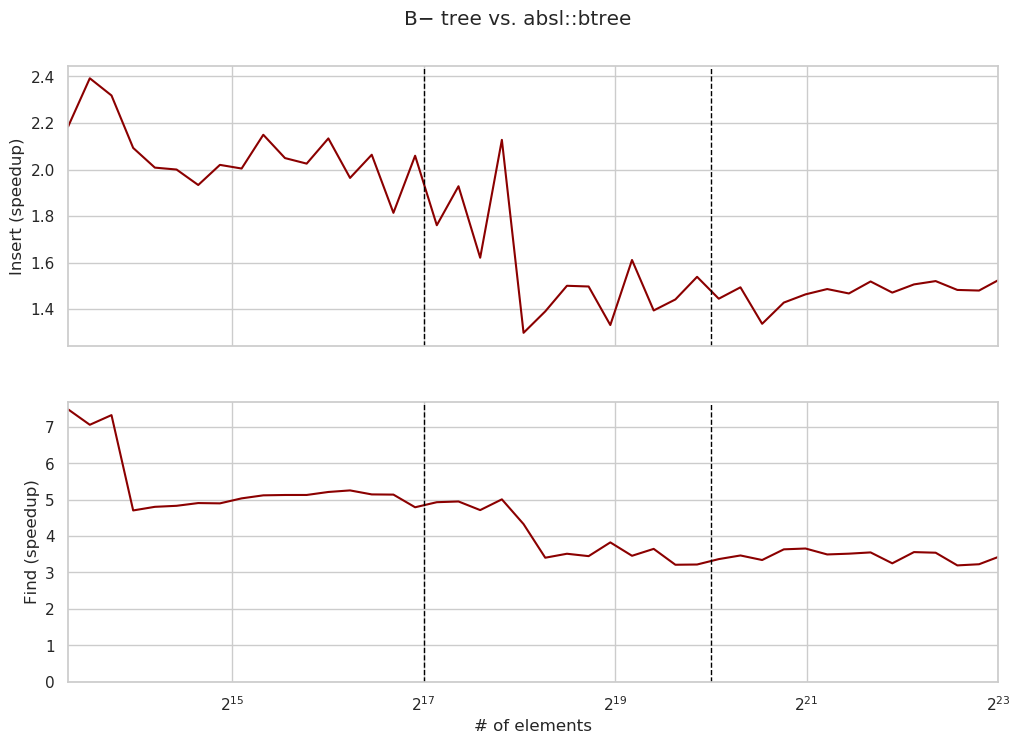

In [25]:
fig, (top, bot) = plt.subplots(2, sharex=True)

top.label_outer()

fig.suptitle('B− tree vs. absl::btree', y=0.95)

plt.xscale('log', basex=2)
plt.xlabel('# of elements')

top.set_ylabel('Insert (speedup)')
bot.set_ylabel('Find (speedup)')

btree_c = 'darkred'

def rel(a, b):
    return [y / x for x, y in zip(a, b)]

top.plot(n, rel(btree_x, absl_x), color=btree_c)
bot.plot(n, rel(btree_y, absl_y), color=btree_c)

plt.ylim(bottom=0)
plt.xlim(10000, 2**23)

for x in [2**13, 2**17, 2**20]:
    for graph in [top, bot]:
        graph.axvline(x=x, color='black', lw=1, linestyle='--')

plt.margins(0)

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('btree-absl.svg')

plt.show()